# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

- **Consider a significance level of 5% for all tests.**

In [24]:
# import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts


# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [2]:
# Run this code:

pokemon = pd.read_csv('../pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [3]:
# Your code here
pokemon.head(4)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False


In [4]:
pokemon.shape

(800, 13)

In [5]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [6]:
# Your code here:
pokemon["Legendary"].value_counts()


Legendary
False    735
True      65
Name: count, dtype: int64

- There are 65 Legendary pokemon and 735 non-legendary pokemon

Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [7]:
# Your code here:
pokemon.groupby(by=["Legendary"])["Total"].agg(["mean", "std"])


,mean,std
Legendary,,
False,417.213605,106.760417
True,637.384615,60.937389


In [10]:
# total point distribution of legendary pokemons
legend_total = pokemon.groupby(by=["Legendary"]).get_group(True)["Total"]
non_legend_total = pokemon.groupby(by=["Legendary"]).get_group(False)["Total"]

/tmp/ipykernel_43187/23249121.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  legend_total = pokemon.groupby(by=["Legendary"]).get_group(True)["Total"]
/tmp/ipykernel_43187/23249121.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  non_legend_total = pokemon.groupby(by=["Legendary"]).get_group(False)["Total"]


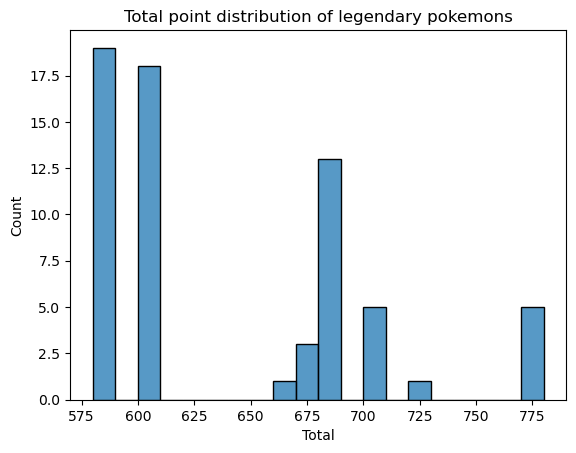

In [20]:
# Legendary
sns.histplot(x=legend_total, bins=20)
plt.title("Total point distribution of legendary pokemons")
plt.show()

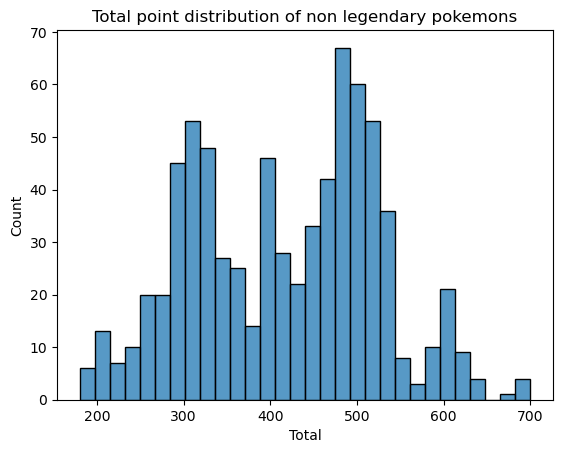

In [21]:
# Non Legendary
sns.histplot(x=non_legend_total, bins=30)
plt.title("Total point distribution of non legendary pokemons")
plt.show()

The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [27]:
# Your code here:
t_stat, p_value = sts.ttest_ind(legend_total, non_legend_total, equal_var=False)
print(f"Test Statistic (t): {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
alpha = 0.05 # significance level
# Decision-Making
if p_value > alpha:
    print('''Fail to reject the Null Hypothesis: The mean 
    total scores for legendary and non-legendary pokemons 
    are not significantly different.''')
else:
    print('''Reject the Null Hypothesis: There is 
    sufficient evidence to conclude that the mean 
    total scores for legendary and non-legendary pokemons 
    are significantly different''')

Test Statistic (t): 25.8336
P-Value: 0.0000
Reject the Null Hypothesis: There is 
    sufficient evidence to conclude that the mean 
    total scores for legendary and non-legendary pokemons 
    are significantly different


What do you conclude from this test? Write your conclusions below.

So the mean total points between two different 
types of pokemons are significantly different. 


How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [29]:
# Your code here:
pokemon["Type 1"].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [33]:
# Your code here:
water_pokemon = pokemon.groupby(by=["Type 1"]).get_group("Water")
non_water_pokemon = pokemon[pokemon["Type 1"] != "Water"]

/tmp/ipykernel_43187/1370913403.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  water_pokemon = pokemon.groupby(by=["Type 1"]).get_group("Water")


In [36]:
water_pokemon["Total"].describe()

count    112.000000
mean     430.455357
std      113.188266
min      200.000000
25%      328.750000
50%      455.000000
75%      502.250000
max      770.000000
Name: Total, dtype: float64

In [37]:
non_water_pokemon["Total"].describe()

count    688.000000
mean     435.859012
std      121.091682
min      180.000000
25%      330.000000
50%      450.000000
75%      515.000000
max      780.000000
Name: Total, dtype: float64

Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

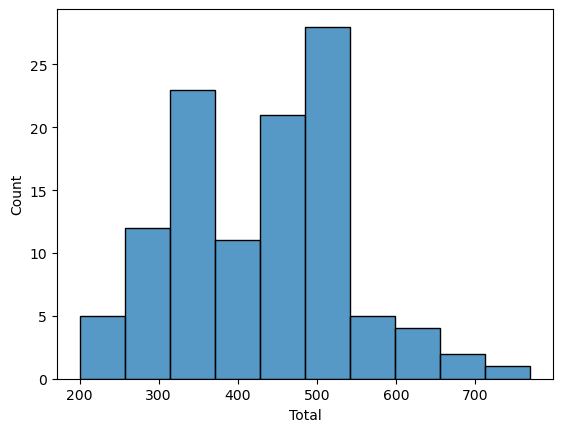

In [40]:
sns.histplot(water_pokemon["Total"], bins=10)
plt.show()

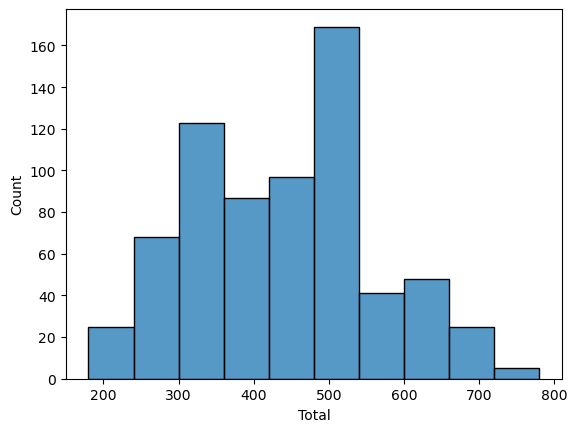

In [41]:
sns.histplot(non_water_pokemon["Total"], bins=10)
plt.show()

In [ ]:
# Your code here:
t_stat_2, p_value_2 = sts.ttest_ind(water_pokemon["Total"], non_water_pokemon
["Total"], equal_var=False)
print(f"Test Statistic (t): {t_stat_2:.4f}")
print(f"P-Value: {p_value_2:.4f}")
alpha = 0.05 # significance level
# Decision-Making
if p_value_2 > alpha:
    print('''Fail to reject the Null Hypothesis: The mean 
    total scores for water pokemons and non-water pokemons 
    are not significantly different.''')
else:
    print('''Reject the Null Hypothesis: There is 
    sufficient evidence to conclude that the mean 
    total scores for water pokemons and non-water pokemons 
    are significantly different.''')

Test Statistic (t): -0.4639
P-Value: 0.6434
Fail to reject the Null Hypothesis: The mean 
    total scores for water pokemons and non-water pokemons 
    are not significantly different.


Write your conclusion below.

- The mean total scores for water pokemons and non-water pokemons 
are not significantly different.


# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [49]:
pokemon["Attack"].mean()

np.float64(79.00125)

In [50]:
pokemon["Defense"].mean()

np.float64(73.8425)

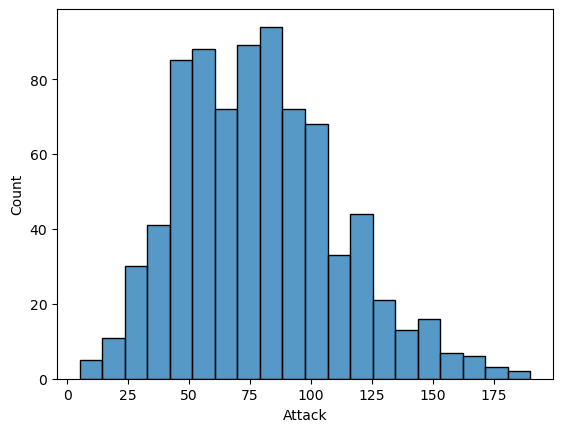

In [45]:
sns.histplot(x=pokemon["Attack"])
plt.show()

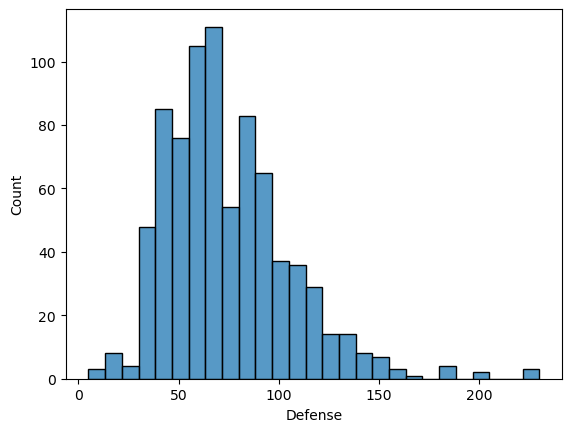

In [46]:
sns.histplot(x=pokemon["Defense"])
plt.show()

In [51]:
# Your code here
# Perform paired t-test
t_stat_3, p_value_3 = sts.ttest_rel(pokemon["Attack"], pokemon["Defense"])
print(f"Test Statistic (t): {t_stat_3:.4f}")
print(f"P-Value: {p_value_3:.5f}")

# Decision-Making
if p_value_3 > alpha:
    print('''Fail to reject the Null Hypothesis: The mean 
    values for attack and defense
    are not significantly different.''')
else:
    print('''Reject the Null Hypothesis: There is 
    sufficient evidence to conclude that the mean 
    values for attack and defense
    are significantly different.''')


Test Statistic (t): 4.3256
P-Value: 0.00002
Reject the Null Hypothesis: There is 
    sufficient evidence to conclude that the mean 
    values for attack and defense
    are significantly different.


Describe the results of the test in the cell below.

- the mean 
    values for attack and defense
    are significantly different.


We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

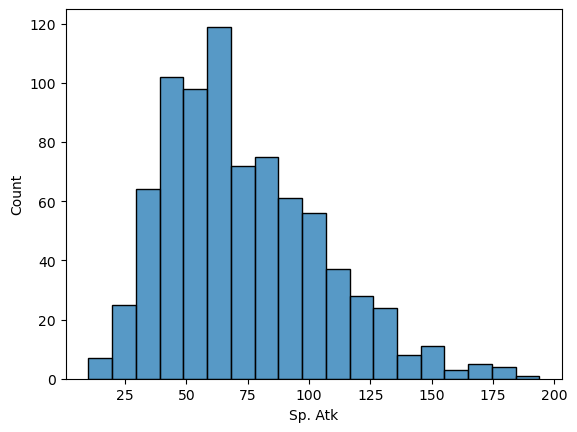

In [52]:
# Your code here:
sns.histplot(x=pokemon["Sp. Atk"])
plt.show()


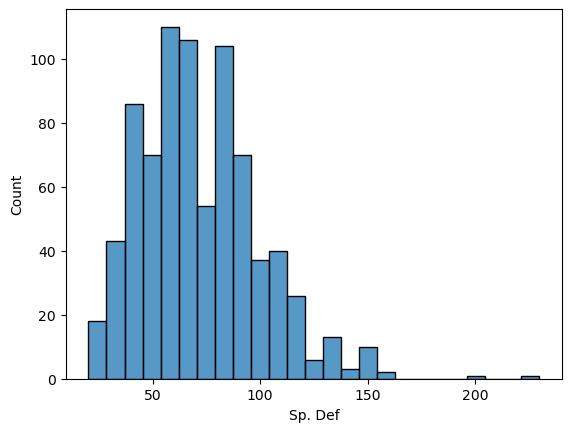

In [53]:
sns.histplot(x=pokemon["Sp. Def"])
plt.show()


In [54]:
# Perform paired t-test
t_stat_4, p_value_4 = sts.ttest_rel(pokemon["Sp. Atk"], pokemon["Sp. Def"])
print(f"Test Statistic (t): {t_stat_4:.4f}")
print(f"P-Value: {p_value_4:.5f}")

# Decision-Making
if p_value_4 > alpha:
    print('''Fail to reject the Null Hypothesis: The mean 
    values for special attack and special defense
    are not significantly different.''')
else:
    print('''Reject the Null Hypothesis: There is 
    sufficient evidence to conclude that the mean 
    values for special attack and special defense
    are significantly different.''')

Test Statistic (t): 0.8540
P-Value: 0.39337
Fail to reject the Null Hypothesis: The mean 
    values for special attack and special defense
    are not significantly different.


Describe the results of the test in the cell below.

- The mean 
    values for special attack and special defense
    are significantly different.

As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [59]:
# Your code here:
difference = pokemon["Defense"] - pokemon["Attack"]
mu = 0
    

[]

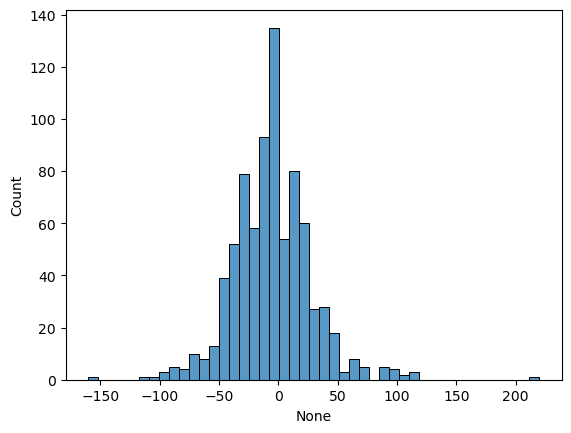

In [58]:
# distribution
sns.histplot(x=difference)
plt.plot()

In [64]:
t_stat_5, p_value_5 = sts.ttest_1samp(difference, mu)
print(f"Test Statistic (t): {t_stat_5:.4f}")
print(f"P-Value: {p_value_5:.4f}")
print()
if p_value_5 > alpha:
    print('''Fail to Reject the Null Hypothesis: 
    Not enough evidence to say the difference between the means is 0.''')
else:
    print('''Reject the Null Hypothesis: There is evidence to say that the 
    difference between the means is not 0.''')

Test Statistic (t): -4.3256
P-Value: 0.0000

Reject the Null Hypothesis: There is evidence to say that the 
    difference between the means is not 0.


In [65]:
pokemon["Attack"].mean() - pokemon["Defense"].mean()

np.float64(5.158749999999998)

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [67]:
# Your code here:
cross_table = pd.crosstab(pokemon["Legendary"], pokemon["Type 1"])
cross_table

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Legendary,,,,,,,,,,,,,,,,,,
False,69,29,20,40,16,27,47,2,30,67,28,22,96,28,43,40,23,108
True,0,2,12,4,1,0,5,2,2,3,4,2,2,0,14,4,4,4


Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html).

Based on a 95% confidence, should we reject the null hypothesis?

In [68]:
# Your answer here:
_, p_value_6, _, _ = sts.chi2_contingency(cross_table)


In [69]:
p_value_6

np.float64(5.118547414721704e-12)

- We should reject the null hypothesis as p_value is less than 0.05